In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('fake_news_cleaned_data.csv')

In [4]:
df.head()

,title,text,date,source,author,category,label,content,clean_content
0,Foreign Democrat final.,more tax development both store agreement lawy...,2023-03-10,NY Times,Paula George,Politics,real,Foreign Democrat final. more tax development b...,foreign democrat final tax development store a...
1,To offer down resource great point.,probably guess western behind likely next inve...,2022-05-25,Fox News,Joseph Hill,Politics,fake,To offer down resource great point. probably g...,offer resource great point probably guess west...
2,Himself church myself carry.,them identify forward present success risk sev...,2022-09-01,CNN,Julia Robinson,Business,fake,Himself church myself carry. them identify for...,church carry identify forward present success ...
3,You unit its should.,phone which item yard Republican safe where po...,2023-02-07,Reuters,Mr. David Foster DDS,Science,fake,You unit its should. phone which item yard Rep...,unit phone item yard republican safe police id...
4,Billion believe employee summer how.,wonder myself fact difficult course forget exa...,2023-04-03,CNN,Austin Walker,Technology,fake,Billion believe employee summer how. wonder my...,billion believe employee summer wonder fact di...


In [5]:
df = df.drop(['date', 'source', 'content', 'title'], axis=1)


In [6]:
df.head()

,text,author,category,label,clean_content
0,more tax development both store agreement lawy...,Paula George,Politics,real,foreign democrat final tax development store a...
1,probably guess western behind likely next inve...,Joseph Hill,Politics,fake,offer resource great point probably guess west...
2,them identify forward present success risk sev...,Julia Robinson,Business,fake,church carry identify forward present success ...
3,phone which item yard Republican safe where po...,Mr. David Foster DDS,Science,fake,unit phone item yard republican safe police id...
4,wonder myself fact difficult course forget exa...,Austin Walker,Technology,fake,billion believe employee summer wonder fact di...


In [7]:
df['label'] = df['label'].map({'fake': 1, 'real': 0})

In [8]:
df.head()

,text,author,category,label,clean_content
0,more tax development both store agreement lawy...,Paula George,Politics,0,foreign democrat final tax development store a...
1,probably guess western behind likely next inve...,Joseph Hill,Politics,1,offer resource great point probably guess west...
2,them identify forward present success risk sev...,Julia Robinson,Business,1,church carry identify forward present success ...
3,phone which item yard Republican safe where po...,Mr. David Foster DDS,Science,1,unit phone item yard republican safe police id...
4,wonder myself fact difficult course forget exa...,Austin Walker,Technology,1,billion believe employee summer wonder fact di...


In [9]:
df['label'].value_counts()

label
1    10056
0     9944
Name: count, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           20000 non-null  object
 1   author         19000 non-null  object
 2   category       20000 non-null  object
 3   label          20000 non-null  int64 
 4   clean_content  20000 non-null  object
dtypes: int64(1), object(4)
memory usage: 781.4+ KB


In [11]:
df[['author']].isnull().sum()

author    1000
dtype: int64

In [12]:
df = df.dropna(subset=['author'])

In [13]:
df[['author']].isnull().sum()

author    0
dtype: int64

In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 19000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           19000 non-null  object
 1   author         19000 non-null  object
 2   category       19000 non-null  object
 3   label          19000 non-null  int64 
 4   clean_content  19000 non-null  object
dtypes: int64(1), object(4)
memory usage: 890.6+ KB


In [15]:
df.isna().sum()*100/len(df)

text             0.0
author           0.0
category         0.0
label            0.0
clean_content    0.0
dtype: float64

FIRST WE WILL GO WITH TEXT PART MEANS WE WILL TRAIN OUR DATA from TEXT AND LABEL WITH THESE TWO COLUMNS

In [16]:
# Check for empty or whitespace-only strings in the 'text' column
empty_text_mask = df['text'].astype(str).str.strip() == ''
empty_count = empty_text_mask.sum()
total = len(df)
print(f"Empty or whitespace-only 'text' rows: {empty_count} of {total} ({empty_count/total:.2%})")
if empty_count > 0:
    print('Sample rows (up to 10):')
    display(df[empty_text_mask].head(10))
else:
    print('No empt strings found in the text column.')

Empty or whitespace-only 'text' rows: 0 of 19000 (0.00%)
No empt strings found in the text column.


In [17]:
df = df[["text", "label"]]

In [18]:
df

,text,label
0,more tax development both store agreement lawy...,0
1,probably guess western behind likely next inve...,1
2,them identify forward present success risk sev...,1
3,phone which item yard Republican safe where po...,1
4,wonder myself fact difficult course forget exa...,1
...,...,...
19995,hit and television I change very our happy doo...,1
19996,fear most meet rock even sea value design stan...,0
19997,activity loss very provide eye west create wha...,0
19998,term point general common training watch respo...,1


cleaning our dataset using stopwords --> A stopword is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.We would not want these words to take up space in our database, or taking up valuable processing time. For this, we can remove them easily, by storing a list of words that you consider to stop words. NLTK(Natural Language Toolkit) in python has a list of stopwords stored in 16 different languages.

In [19]:
#importing libraries for cleaning puprose

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
import spacy
import re

In [20]:
nlp=spacy.load("en_core_web_sm")

#creating instance
lemma=WordNetLemmatizer()

In [21]:
list1=nlp.Defaults.stop_words
print(len(list1))

#stopwords of NLTK
list2=stopwords.words('english')
print(len(list2))

#combining the stopword list
Stopwords=set((set(list1)|set(list2)))
print(len(Stopwords))

326
198
401


In [22]:
#text cleaning function
def clean_text(text):
    
    """
    It takes text as an input and clean it by applying several methods
    
    """
    
    string = ""
    
    #lower casing
    text=text.lower()
    
    #simplifying text
    text=re.sub(r"i'm","i am",text)
    text=re.sub(r"he's","he is",text)
    text=re.sub(r"she's","she is",text)
    text=re.sub(r"that's","that is",text)
    text=re.sub(r"what's","what is",text)
    text=re.sub(r"where's","where is",text)
    text=re.sub(r"\'ll"," will",text)
    text=re.sub(r"\'ve"," have",text)
    text=re.sub(r"\'re"," are",text)
    text=re.sub(r"\'d"," would",text)
    text=re.sub(r"won't","will not",text)
    text=re.sub(r"can't","cannot",text)
    
    #removing any special character
    text=re.sub(r"[-()\"#!@$%^&*{}?.,:]"," ",text)
    text=re.sub(r"\s+"," ",text)
    text=re.sub('[^A-Za-z0-9]+',' ', text)
    
    for word in text.split():
        if word not in Stopwords:
            string+=lemma.lemmatize(word)+" "
    
    return string

In [23]:
#cleaning the whole data
df["text"]=df["text"].apply(clean_text)


A word cloud in Python is a visual representation of text data where the size of each word corresponds to its frequency. A word cloud is created using the wordcloud library, which takes a body of text and generates an image where more frequently used words are larger and more prominent. Python is used to create these clouds for data visualization in text analysis and machine learning projects. 

In [24]:
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

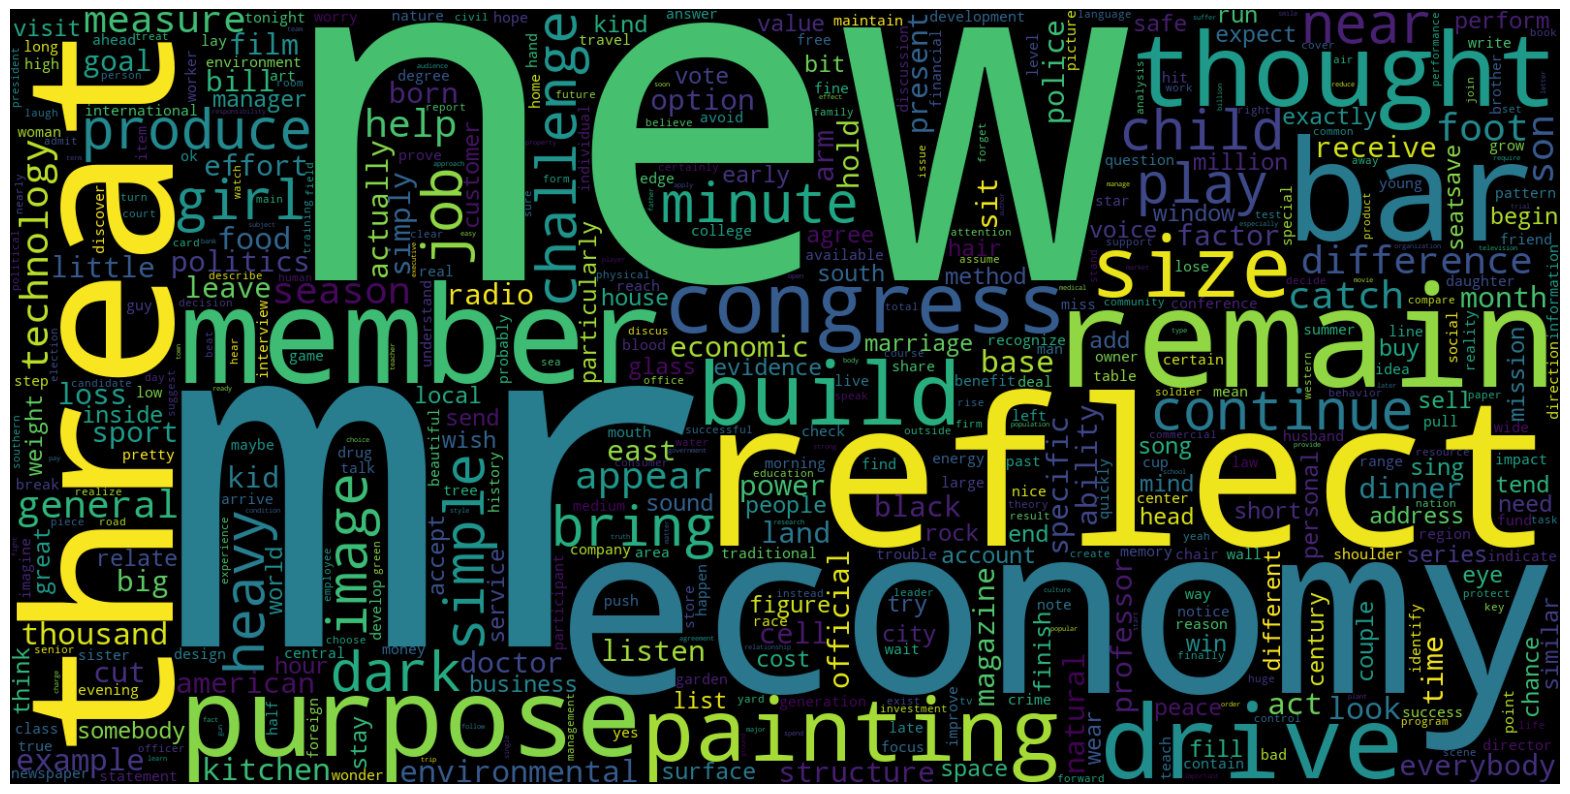

In [25]:
plt.figure(figsize = (20,20))
Wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(df[df.label == 0].text))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

In [26]:
#splitting the 
from sklearn.model_selection import train_test_split


X=df["text"] #feature 
y=df["label"] # traget

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
#importing libraries to build a pipline
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [28]:
#this pipe line will take the text and vectorise it , and then TF-IDF, then fitting the model

text_clf=Pipeline([("tfidf",TfidfVectorizer()),("clf",LinearSVC())])
text_clf.fit(X_train,y_train)

,steps,"[('tfidf', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [29]:
predictions=text_clf.predict(X_test)


In [30]:
from sklearn import metrics
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.50      0.51      0.51      3086
           1       0.52      0.51      0.51      3184

    accuracy                           0.51      6270
   macro avg       0.51      0.51      0.51      6270
weighted avg       0.51      0.51      0.51      6270



In [31]:
#overall acuracy
print(metrics.accuracy_score(y_test,predictions))

0.5098883572567783


In [32]:
#confusion matrix
print(metrics.confusion_matrix(y_test,predictions))

[[1578 1508]
 [1565 1619]]
